Aim: Explore the Passive Vehicular Sensors Datasets [ from Kaggle](https://www.kaggle.com/jefmenegazzo/pvs-passive-vehicular-sensors-datasets)

The source consists of PVS datasets for 3 cars driven by 3 different drivers in 3 different situations. i.e. total 9 datasets. 

Each dataset consists of following 14 files:



*   dataset_gps.csv- GPS data, including latitude, longitude, altitude, speed, accuracy, etc
*   dataset_gps_mpu_left.csv- Inertial sensor data on the left side of the vehicle, combined with GPS data.
*   dataset_gps_mpu_right.csv- Inertial sensor data on the right side of the vehicle, combined with GPS data.
*   dataset_labels.csv- Data classes for each sample data in the dataset (for both sides).
*   dataset_mpu_left.csv- Inertial sensor data on the left side of the vehicle.
*   dataset_mpu_right.csv- Inertial sensor data on the right side of the vehicle.
*   dataset_settings_left.csv- Settings of the inertial sensors placed on the left side of the vehicle. Includes measurement range, resolution, etc.
*   dataset_settings_right.csv- Settings of the inertial sensors placed on the right side of the vehicle. Includes measurement range, resolution, etc.
*   map.html- Interactive maps with data classes.
*   video_dataset_left.mp4- Video with data plotted from inertial sensors and speed, sampled on the left side of the vehicle.
*   video_dataset_right.mp4- Video with data plotted from inertial sensors and speed, sampled on the right side of the vehicle.
*   video_environment.mp4- External environment video.
*   video_environment_dataset_left.mp4- Videos side by side from video_environment.mp4 and video_dataset_left.mp4
*   video_environment_dataset_right.mp4- Videos side by side from video_environment.mp4 and video_dataset_right.mp4

















For this notebook, I will be using only one PVS dataset with the following files:

**dataset_labels.csv,dataset_gps.csv, dataset_mpu_left.csv, dataset_mpu_right.csv**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data labels

In [ ]:
#First file to be explored is the dataset_labels file. 

df1= pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 1/dataset_labels.csv')

In [ ]:
df1.head()

This file consists of data classes- 3 different types of roads(dirt,cobblestone and asphalt), 2 road surafces (paved and unpaved), 3 types of road conditions for both left and right side(good, bad, regular) and information about speed bumps(not present, present on asphalt, present on cobblestone). All this information is present in one-hot encoded form.

In [ ]:
df1.shape

In [ ]:
df1.describe()

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df1.hist(ax = ax)

**From the graphs, this can be analysed that the road was mostly paved and cobblestone and asphalt but rarely dirt road. There were hardly any speed bumps on the road. On both the sides (left and right), the road condition was same (mosty regular)**

### GPS Data

In [ ]:
#Looking at the first file: dataset_gps

df2= pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 1/dataset_gps.csv')

In [ ]:
df2.head(10)

In [ ]:
df2.info()

Exploring each column one by one 

In [ ]:
#Removing null columns 
df2=df2.drop(columns=['ageofdgpsdata','dgpsid', 'activity','annotation'])

In [ ]:
df2['provider'].unique()
#As the provider is gps always, this coulmn can be removed too

In [ ]:
#Decoding timestamps 
from datetime import datetime
dt_object = datetime.fromtimestamp(df2['timestamp'][1340])-datetime.fromtimestamp(df2['timestamp'][0])
print(dt_object)


On decoding the timestamps, we get to know that data is collected every 1 to 5 seconds for 24:22.5 minutes. The last column 'elpased_time_seconds' show the time interval between every two records. 

In [ ]:
#Plotting how the track looks
plt.plot(df2['longitude'], df2['latitude'])

In [ ]:
#How elevation changes with time
plt.plot(df2['timestamp'], df2['elevation'])

In [ ]:
df2['accuracy'].unique() #Accuracy of the sensor in recording data 

In [ ]:
#Bearing is the compass direction from your current position to your intended destination. 
#There are a few null values for the same. This indiactes the car wasn't moving in any direction at that time
#Checking the speed/m parameter

(df2['speed_meters_per_second'] == 0).sum(axis=0)

So, 25 null values in Bearing column means that the speed was zero at that time. However, GPS coordinates were not same throughout, thus, the vehicle has non zero veloity.

In [ ]:
df2['satellites'].unique() #The satellite being used to identify the GPS co-ordinates

The next three columns hdop, vdop and pdop are horizontal or vertical or position dilution of precision values. They describe current strength of satellite. The values can range from 1-10 and lesser values are preferred. 

In [ ]:
df2['geoidheight'].unique() #Geoid Height is a scientific term that relates latitiude, longitude and height 


In [ ]:
df2['battery'].value_counts()

In [ ]:
plt.plot(df2['timestamp'], df2['battery']) #Battery is reducing with time

In [ ]:
#distance_meters is the distance covered in that given time of 1 sec
df2['distance_meters'].sum()/1000 
#total distance covered in kms

**In the gps dataset, timestamp is the index and the important features are:** 

latitude, longitude/elevation, speed/distance. Others define technicalities of the GPS system. 



### Inertial Sensor Data

We are provided with four data sets having mpu data (two for each side). The MPU-9250 is installed on the dashboard, above suspesion and below suspension on both right and left side. 2 datasets purely have data collected by mpu and 2 have data combined with GPS data(latitude longitude, speed). We will explore the mpu_left and mpu_right datasets. Both of them have the same parameters but different values

In [ ]:
#mpu left file
df3=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 1/dataset_mpu_left.csv')

In [ ]:
df3.head()

In [ ]:
df3.info()

There are no missing values. For each parameter(accelerometer, magnetometer and gyrometer reading- dashboard, above suspension/below suspension/both) , values at x,y and z coordinates are given. The temperature at the 3 positions is also sensed. 

In [ ]:
dt_object = datetime.fromtimestamp(df3['timestamp'][144035])-datetime.fromtimestamp(df3['timestamp'][0])
print(dt_object)
#Data is produced at each microsecond for total of 24 minutes 

In [ ]:
#Changes in temperature
plt.plot(df3['timestamp'], df3['temp_above_suspension'], color='red')
plt.plot(df3['timestamp'], df3['temp_below_suspension'], color='blue')
plt.plot(df3['timestamp'], df3['temp_dashboard'], color='orange')


In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df3['acc_x_dashboard'], df3['acc_y_dashboard'], df3['acc_z_dashboard'], cmap='Greens');



---



To get more clear trends, let's consider data produced by accelerometer as a vector with x, y and z magnitude. So, the magnitude of the vector is defined as the following:
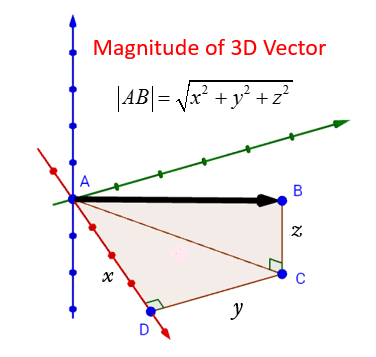
Creating new variable to store the value

In [ ]:
def magnitude(vector): 
    return math.sqrt(sum(pow(element, 2) for element in vector))

In [ ]:
# We will be making this new parameter for acc_dashboard, acc_above_suspension , acc_below_suspension, gyro_above_suspension, gyro_below_suspension, gyro_dashboard, mag_dashboard, mag_above  

import math

acc_dashb=[]
acc_above=[]
acc_below=[]
gyro_above=[]
gyro_below=[]
gyro_dashb=[]
mag_dashb=[]
mag_above=[]

for i in range(0, len(df3)):
  vector=np.array([df3['acc_x_dashboard'][i],df3['acc_y_dashboard'][i],df3['acc_z_dashboard'][i]])
  acc_dashb.append(magnitude(vector))
  vector1=np.array([df3['acc_x_above_suspension'][i],df3['acc_y_above_suspension'][i],df3['acc_z_above_suspension'][i]])
  acc_above.append(magnitude(vector1))
  vector2=np.array([df3['acc_x_below_suspension'][i],df3['acc_y_below_suspension'][i],df3['acc_z_below_suspension'][i]])
  acc_below.append(magnitude(vector2))
  vector3=np.array([df3['gyro_x_above_suspension'][i],df3['gyro_y_above_suspension'][i],df3['gyro_z_above_suspension'][i]])
  gyro_above.append(magnitude(vector3))
  vector4=np.array([df3['gyro_x_below_suspension'][i],df3['gyro_y_below_suspension'][i],df3['gyro_z_below_suspension'][i]])
  gyro_below.append(magnitude(vector4))
  vector5=np.array([df3['gyro_x_dashboard'][i],df3['gyro_y_dashboard'][i],df3['gyro_z_dashboard'][i]])
  gyro_dashb.append(magnitude(vector5))
  vector6=np.array([df3['mag_x_dashboard'][i],df3['mag_y_dashboard'][i],df3['mag_z_dashboard'][i]])
  mag_dashb.append(magnitude(vector6))
  vector7=np.array([df3['mag_x_above_suspension'][i],df3['mag_y_above_suspension'][i],df3['mag_z_above_suspension'][i]])
  mag_above.append(magnitude(vector7))


In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df3['timestamp'], acc_dashb, color='red', ax=ax)
ax.set_title('Acc_dashboard')

ax = fig.add_subplot(312)
sns.lineplot(df3['timestamp'], acc_above, color='blue', ax=ax)
ax.set_title('Acc_above_suspension')

ax = fig.add_subplot(313)
sns.lineplot(df3['timestamp'], acc_below, color='yellow', ax=ax)
ax.set_title('Acc_below_suspension')


In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df3['timestamp'], gyro_dashb, color='red', ax=ax)
ax.set_title('Gyro_dashboard')

ax = fig.add_subplot(312)
sns.lineplot(df3['timestamp'], gyro_above, color='blue', ax=ax)
ax.set_title('Gyro_above_suspension')

ax = fig.add_subplot(313)
sns.lineplot(df3['timestamp'], gyro_below, color='yellow', ax=ax)
ax.set_title('Gyro_below_suspension')


In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(211)
sns.lineplot(df3['timestamp'], mag_dashb, color='red', ax=ax)
ax.set_title('Mag_dashboard')

ax = fig.add_subplot(212)
sns.lineplot(df3['timestamp'], mag_above, color='blue', ax=ax)
ax.set_title('Mag_suspension')




In [ ]:
#Checking for correlation 
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df3.corr(), ax=ax)


***The number of paramters can be significantly reduced by taking each value as a vector and getting its magnitude. All the trends have been shown. The next section has the same for right side. ***

In [ ]:
df4=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 1/dataset_mpu_right.csv')
df4.head()

In [ ]:
df4.info()

Exactly same parameters as previous dataset and no null values. 

In [ ]:
#Changes in temperature
plt.plot(df4['timestamp'], df4['temp_above_suspension'], color='red')
plt.plot(df4['timestamp'], df4['temp_below_suspension'], color='blue')
plt.plot(df4['timestamp'], df4['temp_dashboard'], color='orange')


In [ ]:
# We will be making this new parameter for acc_dashboard, acc_above_suspension , acc_below_suspension, gyro_above_suspension, gyro_below_suspension, gyro_dashboard, mag_dashboard, mag_above  
racc_dashb=[]
racc_above=[]
racc_below=[]
rgyro_above=[]
rgyro_below=[]
rgyro_dashb=[]
rmag_dashb=[]
rmag_above=[]

for i in range(0, len(df4)):
  vector=np.array([df4['acc_x_dashboard'][i],df4['acc_y_dashboard'][i],df4['acc_z_dashboard'][i]])
  racc_dashb.append(magnitude(vector))
  vector1=np.array([df4['acc_x_above_suspension'][i],df4['acc_y_above_suspension'][i],df4['acc_z_above_suspension'][i]])
  racc_above.append(magnitude(vector1))
  vector2=np.array([df4['acc_x_below_suspension'][i],df4['acc_y_below_suspension'][i],df4['acc_z_below_suspension'][i]])
  racc_below.append(magnitude(vector2))
  vector3=np.array([df4['gyro_x_above_suspension'][i],df4['gyro_y_above_suspension'][i],df4['gyro_z_above_suspension'][i]])
  rgyro_above.append(magnitude(vector3))
  vector4=np.array([df4['gyro_x_below_suspension'][i],df4['gyro_y_below_suspension'][i],df4['gyro_z_below_suspension'][i]])
  rgyro_below.append(magnitude(vector4))
  vector5=np.array([df4['gyro_x_dashboard'][i],df4['gyro_y_dashboard'][i],df4['gyro_z_dashboard'][i]])
  rgyro_dashb.append(magnitude(vector5))
  vector6=np.array([df4['mag_x_dashboard'][i],df4['mag_y_dashboard'][i],df4['mag_z_dashboard'][i]])
  rmag_dashb.append(magnitude(vector6))
  vector7=np.array([df4['mag_x_above_suspension'][i],df4['mag_y_above_suspension'][i],df4['mag_z_above_suspension'][i]])
  rmag_above.append(magnitude(vector7))


In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df4['timestamp'], racc_dashb, color='red', ax=ax)
ax.set_title('Acc_dashboard-Right')

ax = fig.add_subplot(312)
sns.lineplot(df4['timestamp'], racc_above, color='blue', ax=ax)
ax.set_title('Acc_above_suspension-Right')

ax = fig.add_subplot(313)
sns.lineplot(df4['timestamp'], racc_below, color='yellow', ax=ax)
ax.set_title('Acc_below_suspension-Right')


In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df4['timestamp'], rgyro_dashb, color='red', ax=ax)
ax.set_title('Gyro_dashboard-Right')

ax = fig.add_subplot(312)
sns.lineplot(df4['timestamp'], rgyro_above, color='blue', ax=ax)
ax.set_title('Gyro_above_suspension-Right')

ax = fig.add_subplot(313)
sns.lineplot(df4['timestamp'], rgyro_below, color='yellow', ax=ax)
ax.set_title('Gyro_below_suspension-Right')


In [ ]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(211)
sns.lineplot(df4['timestamp'], rmag_dashb, color='red', ax=ax)
ax.set_title('Mag_dashboard-right')

ax = fig.add_subplot(212)
sns.lineplot(df4['timestamp'], rmag_above, color='blue', ax=ax)
ax.set_title('Mag_suspension-right')


**Significant differences can be seen between readings of the MPU on two sides.**

# More Data Exploration

In [ ]:
#Starting with data labels file that has one hot encoded data of the road condition

df1.head()

In [ ]:
df1.info() #No null values as expected

In [ ]:
#Creating a function that measures the distribution 
def metricsDataClass(classes):
    
    list_data = []
    list_data.append(df1[classes].sum())
       
    data = pd.DataFrame(list_data)
    data["Total"] = data.sum(axis=1)
    
    for classe in classes:
        data[classe + "%"] = round(data[classe]/data["Total"] * 100, 2)
        
    data.index = np.arange(1, len(data) + 1)
    data.index = data.index.rename("PVS")
    return data

In [ ]:
#Road Surface type
metricsDataClass(["dirt_road", "cobblestone_road", "asphalt_road"])

In [ ]:
#Road surface condition
metricsDataClass(["paved_road", "unpaved_road"])

In [ ]:
#road roughness condition-left
metricsDataClass(["good_road_left", "regular_road_left", "bad_road_left"])

In [ ]:
#road roughness condition-right
metricsDataClass(["good_road_right", "regular_road_right", "bad_road_right"])
#almost same as the left side

In [ ]:
#Speed bumps
metricsDataClass(["speed_bump_asphalt", "speed_bump_cobblestone", "no_speed_bump"])


In [ ]:
#Function to convert one hot encoded values back to labels so that we can use it with other datasets
def one_hot_to_label(df_in, classes, df_out, class_name): 
    conditions = []
    for r in classes:
        conditions.append(df_in[r] == 1)
    df_out[class_name] = np.select(conditions, classes)
    return df_out

The new road type dataset will have road type, condition,quality left, quality right, bumps, Quality (avergae of left and right)

In [ ]:
labels = pd.DataFrame(columns = ['road', 'condition','quality_right', 'quality_left','bumps'])

In [ ]:
road_classes = ['dirt_road', 'cobblestone_road', 'asphalt_road']
quality_left_classes = ['good_road_left', 'regular_road_left', 'bad_road_left']
quality_right_classes = ['good_road_right', 'regular_road_right', 'bad_road_right']
condition_classes = ['paved_road', 'unpaved_road']
bump_classes=['no_speed_bump', 'speed_bump_asphalt', 'speed_bump_cobblestone']

In [ ]:
# Convert from one-hot encoding to single label encoding
labels = one_hot_to_label(df1, road_classes, labels, 'road')
labels = one_hot_to_label(df1, quality_right_classes, labels, 'quality_right')
labels = one_hot_to_label(df1, quality_left_classes, labels, 'quality_left')
labels = one_hot_to_label(df1, condition_classes, labels, 'condition')
labels = one_hot_to_label(df1, bump_classes, labels, 'bumps')

In [ ]:
# Convert road quality labels to numeric values
labels = labels.replace({'quality_right' : { 'good_road_right' : 2, 'regular_road_right' : 1, 'bad_road_right' : 0 }})
labels = labels.replace({'quality_left' : { 'good_road_left' : 2, 'regular_road_left' : 1, 'bad_road_left' : 0 }})
labels['quality'] = labels.loc[: , "quality_right":"quality_left"].mean(axis=1)
labels = labels.drop(columns = ["quality_right","quality_left"], axis = 1)

In [ ]:
labels.head()

From the GPS MPU dataset for left and right side, we have a total of 18 acceleration values, 18 gyrometer values and 12 magnetomter values. 


* Sum absolute values of all 18 values and combine in a single column (divided by number of axis (9)). 
*   Taking average of both left and right side values



In [ ]:
acc_columns = [
    'acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard',
    'acc_x_above_suspension', 'acc_y_above_suspension',
    'acc_z_above_suspension', 'acc_x_below_suspension',
    'acc_y_below_suspension', 'acc_z_below_suspension'
]

gyro_columns= ['gyro_x_dashboard', 'gyro_y_dashboard', 'gyro_z_dashboard',
    'gyro_x_above_suspension', 'gyro_y_above_suspension',
    'gyro_z_above_suspension', 'gyro_x_below_suspension',
    'gyro_y_below_suspension', 'gyro_z_below_suspension']

mag_columns= ['mag_x_dashboard', 'mag_y_dashboard', 'mag_z_dashboard',
    'mag_x_above_suspension', 'mag_y_above_suspension',
    'mag_z_above_suspension']

acc_axis = len(acc_columns)
gyro_axis = len(gyro_columns)
mag_axis = len(mag_columns)

In [ ]:
df_left=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 1/dataset_gps_mpu_left.csv')
df_right=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 1/dataset_gps_mpu_right.csv')

In [ ]:
def absolute(columns, axis):
  sum_left = df_left[columns].abs().sum(axis=1).div(axis)
  sum_right = df_right[columns].abs().sum(axis=1).div(axis)
  
  return pd.concat([sum_left, sum_right], axis=1).mean(axis=1)

In [ ]:
mpu = pd.DataFrame(columns = ['acceleration', 'gyro','mag'])
mpu['acceleration']= absolute(acc_columns, acc_axis)
mpu['gyro']= absolute(gyro_columns, gyro_axis)
mpu['mag']= absolute(mag_columns, mag_axis)

From the GPS dataset, we will take timestamp, latitude, longitude and speed

In [ ]:
gps=df_left.iloc[:,-4:]

In [ ]:
#Combing all the relevant data into single dataset 
temp = pd.concat([gps, labels], axis = 1)
data= pd.concat([temp,mpu], axis=1)

In [ ]:
#This is how final data looks like for PVS1
data.head()

In [ ]:
data.info()

In [ ]:
data.drop_duplicates(keep=False,inplace=True) #no duplicates found


In [ ]:
#clustering to find patterns

cluster_columns=['speed','quality','acceleration','gyro','mag']

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

clusters = scaler.fit_transform(data[cluster_columns])
clusters = pd.DataFrame(data, columns=cluster_columns)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters):
    model = KMeans(n_clusters, random_state=0)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary



In [ ]:
#clustering into 6 as we have 3 types of roads and 2 conditions for each row
cluster_results = kmeans_cluster(clusters, 6)
cluster_summary = summarize_clustering(cluster_results)

In [ ]:
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In [ ]:
#Having so many clusters isn't helping, let's try with less parameters and only 3 clusters 

cluster_results = kmeans_cluster(clusters, 3)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In [ ]:
sns.scatterplot(cluster_results['speed'], cluster_results['acceleration'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

In [ ]:
sns.scatterplot(cluster_results['speed'], cluster_results['gyro'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

In [ ]:
sns.scatterplot(cluster_results['speed'], cluster_results['mag'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

Result: No significant difference can be seen between cluster 0 and 2 in terms of acceleration, only speed is a parameter that is contrasted because speed increased as the journey progressed. 
So, data has clearly 3 clusters:

- Cluster 1= high speed, low gyrometer reading
- Cluster 0= Low speed, low gyrometer reading, low magnetometer reading
- Cluster 2= Low speed, high gyrometer and magnetometer reading

In [ ]:
data.groupby(['road']).mean()['acceleration']

In [ ]:
data.groupby(['road']).mean()['speed']

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['timestamp_gps','road']).mean()['acceleration'].unstack().plot(ax=ax)

#How type of road impacts acceleration

Insights

- Acceleration at the 3 positions (dashboard, above and below suspension) follow the same trend. 
- Temperature recorded at the dashboard is approximately average of that recorded above and below the suspension
- Acceleration suffers a change when the road condition changes
- During a single ride, on clustering the data, we see normal behaviour of the vehicle as clusters are distinct 
- Vehicle has highest speed on asphalt road but highest acceleration on cobblestone road. Obvioulsly, speed is greater on paved road
- Higher speeds on higher quality road